In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/combined-wine-data/wineanalysis.csv


In [4]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Combined wine**

In [5]:
df= pd.read_csv("/kaggle/input/combined-wine-data/wineanalysis.csv", index_col=0)
print("df shape:", df.shape)
print(df.info())
df.head()

df shape: (6497, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


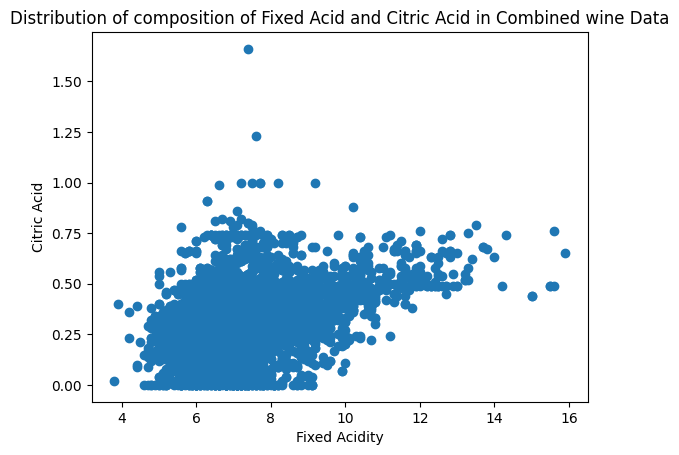

In [6]:
plt.scatter(df["fixed.acidity"], df["citric.acid"])
plt.xlabel("Fixed Acidity")
plt.ylabel("Citric Acid")
plt.title("Distribution of composition of Fixed Acid and Citric Acid in Combined wine Data");

In [7]:
#Pearson correlation coefficient
p_correlation= df["fixed.acidity"].corr(df["citric.acid"])
print("p correlation:", p_correlation)

p correlation: 0.3244357254472984


In [8]:
df[["fixed.acidity", "citric.acid"]].describe()

,fixed.acidity,citric.acid
count,6497.000000,6497.000000
mean,7.215307,0.318633
std,1.296434,0.145318
min,3.800000,0.000000
25%,6.400000,0.250000
50%,7.000000,0.310000
75%,7.700000,0.390000
max,15.900000,1.660000


<AxesSubplot: >

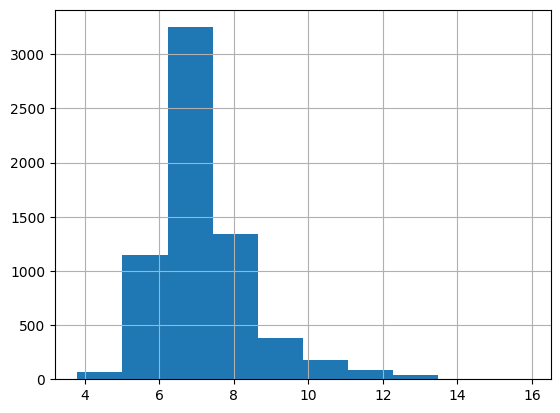

In [9]:
df["fixed.acidity"].hist()

In [10]:
df.select_dtypes("object")

,type
1,red
2,red
3,red
4,red
5,red
...,...
6493,white
6494,white
6495,white
6496,white


In [11]:
df.select_dtypes("number");